In [115]:
# model installs
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# plotly installs
import plotly
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [116]:
# --data loader-------------------------


def load_data():
    df = pd.read_csv("bank-full.csv", skiprows=0, delimiter=";")
    df = df[["job", "marital", "default", "housing", "poutcome", "y"]]

    le = LabelEncoder()
    label = le.fit_transform(df["y"])
    df.drop(["y"], axis=1, inplace=True)
    df["y"] = label

    return df

In [117]:
# --data preprocessing--------------------


def process(df):
    le = LabelEncoder()

    d = {
        "management": 1,
        "technician": 2,
        "entrepreneur": 3,
        "blue-collar": 4,
        "unknown": 5,
        "retired": 6,
        "admin.": 7,
        "services": 8,
        "self-employed": 9,
        "unemployed": 10,
        "housemaid": 11,
        "student": 12,
    }
    numeric_var = {
        "poutcome": {"success": 4, "failure": 3, "other": 2, "unknown": 1},
        "job": d,
        "marital": {"married": 1, "single": 2, "divorced": 3},
    }
    df = df.replace(numeric_var)

    housing = le.fit_transform(df["housing"])
    default = le.fit_transform(df["default"])

    df.drop(["housing", "default"], axis=1, inplace=True)
    df["housing"] = housing
    df["default"] = default

    return df[["job", "poutcome", "housing", "marital", "default"]]

In [153]:
# --plotter function--------------------
def plotly_hist(df, jobtype, poutcometype):

    plot_series1 = df["y"]
    plot_series2 = df[(df.poutcome == poutcometype) & (df.job == jobtype)][
        "y"
    ].astype(int)

    fig = go.Figure()

    fig.add_trace(
        go.Histogram(
            x=plot_series1,
            name="all data",
            nbinsx=2,
            histfunc="sum",
            histnorm="probability density",
        ),
    )
    fig.add_trace(
        go.Histogram(
            x=plot_series2,
            name="selection",
            nbinsx=2,
            histfunc="sum",
            histnorm="probability density",
        ),
    )

    fig.update_layout(
        bargap=0.2,
        title_text=f"Probability distibution",  # title of plot
        xaxis_title_text="subscription",  # xaxis label
        yaxis_title_text="probability density",  # yaxis label
        bargroupgap=0.1,
        template="seaborn",
    )

    fig.update_xaxes(ticktext=["No", "Yes"], tickvals=[0, 1])

    fig.update_traces(opacity=0.9)

    fig.show()

In [134]:
df = load_data()
df["y"].index.max()

45210

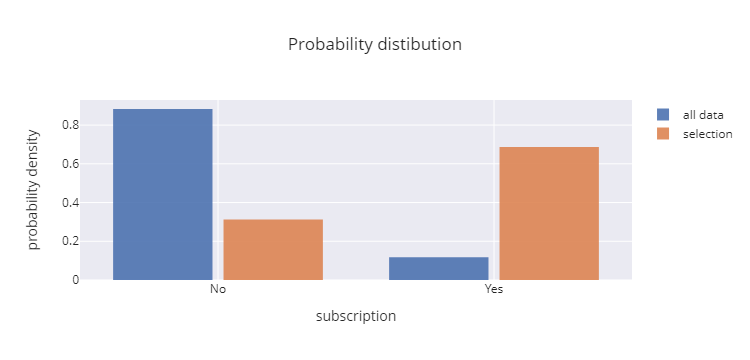

In [154]:
plotly_hist(
    df,
    "management",
    "success",
)